<a href="https://colab.research.google.com/github/shovo896/ML_Models-/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration = 1, Loss = 6055.6449
Iteration = 1, Loss = 24992611.1154


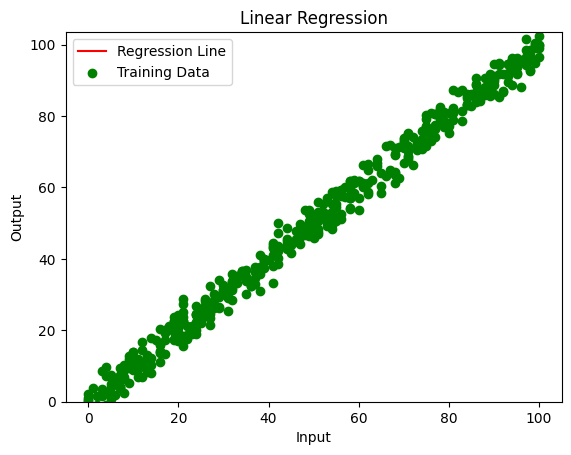

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

url = 'https://media.geeksforgeeks.org/wp-content/uploads/20240320114716/data_for_lr.csv'
data = pd.read_csv(url)

data = data.dropna()

train_input = np.array(data.x[0:500]).reshape(-1, 1)
train_output = np.array(data.y[0:500]).reshape(-1, 1)

test_input = np.array(data.x[500:700]).reshape(-1, 1)
test_output = np.array(data.y[500:700]).reshape(-1, 1)


class LinearRegression:
    def __init__(self):
        self.parameters = {}
        self.loss = []

    def forward_propagation(self, train_input):
        m = self.parameters['m']
        c = self.parameters['c']
        predictions = m * train_input + c
        return predictions

    def cost_function(self, predictions, train_output):
        cost = np.mean((train_output - predictions) ** 2)
        return cost

    def backward_propagation(self, train_input, train_output, predictions):
        derivatives = {}
        df = (predictions - train_output)
        dm = 2 * np.mean(train_input * df)
        dc = 2 * np.mean(df)
        derivatives['dm'] = dm
        derivatives['dc'] = dc
        return derivatives

    def update_parameters(self, derivatives, learning_rate):
        self.parameters['m'] -= learning_rate * derivatives['dm']
        self.parameters['c'] -= learning_rate * derivatives['dc']

    def train(self, train_input, train_output, learning_rate=0.01, iters=50):
        self.parameters['m'] = np.random.uniform(-1, 1)
        self.parameters['c'] = np.random.uniform(-1, 1)
        self.loss = []

        fig, ax = plt.subplots()
        x_vals = np.linspace(min(train_input), max(train_input), 100)
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals + self.parameters['c'], color='red', label='Regression Line')
        ax.scatter(train_input, train_output, marker='o', color='green', label='Training Data')
        ax.set_ylim(0, max(train_output) + 1)

        def update(frame):
            predictions = self.forward_propagation(train_input)
            cost = self.cost_function(predictions, train_output)
            derivatives = self.backward_propagation(train_input, train_output, predictions)
            self.update_parameters(derivatives, learning_rate)
            line.set_ydata(self.parameters['m'] * x_vals + self.parameters['c'])
            self.loss.append(cost)
            print(f"Iteration = {frame + 1}, Loss = {cost:.4f}")
            return line,

        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True)

        # If ffmpeg not installed, comment out next line
        # ani.save('linear_regression_A.gif', writer='ffmpeg')

        plt.xlabel('Input')
        plt.ylabel('Output')
        plt.title('Linear Regression')
        plt.legend()
        plt.show()

        return self.parameters, self.loss


#  Run training
model = LinearRegression()
params, losses = model.train(train_input, train_output, learning_rate=0.01, iters=50)
